## พลอตแผนที่ลมเฉลี่ยระดับโลกและค่าเบี่ยงเบนมาตรฐาน
    * ใช้ข้อมูล reanalysis data ที่ชื่อ NCEP-DOE Reanalysis 2: Pressure level ลิงก์ https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.pressure.html
    * โดยใช้ข้อมูล ลมในแนวตะวันออก-ตะวันตก ที่เรียก zonal wind หรือ u-wind แบบค่าเฉลี่ยรายเดือน ที่เก็บข้อมูลในรูปแบบ netcdf ในแต่ละระดับความกดอากาศ จากลิงก์ https://bit.ly/3r6Bfpk
    
    สิ่งที่จะได้เรียน มีดังต่อไปนี้
        * การอ่านข้อมูล NetCDF และเก็บไว้ใน XArray
        * การอ่านและทำความเข้าใจโครงสร้างของ NetCDF ผ่าน XArray
        * การหาค่าเฉลี่ยของข้อมูล renalysis แบบรายเดือน
        * การพลอตข้อมูลผลลัพธ์ค่าเฉลี่ยลม zonal wind component หรือ U-wind ในรูปแบบแผนที่ระดับโลก ซึ่งหมายถึงลมที่พัดในแนวตะวันออก-ตะวันตก หากพบว่าลมมีเครื่องหมาย + หมายถึง ลมพัดจากทิศตะวันตกไปยังทิศตะวันออก (west to east) ในขณะที่หากพบว่าลมมีเครื่องหมาย - หมายถึงลมพัดจากทิศตะวันออกไปยังทิศตะวันตก (east to west)
        
    * โค้ดได้มาจากลิงก์  
        * https://bit.ly/3LGp2Q0
        * https://www.youtube.com/watch?v=vHrizn6sllE
        * ลิ้งก์นี้ มีโค้ดในการพลอตแผนที่ภูมิอากาศมากมาย https://github.com/sonnymetvn/Basic-Python-for-Meteorology/tree/main/notebook


* สูตรในการคำนวณ anomalies https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/anomalies.html นั่นคือ anomaly = X -Climatological mean


## 1.นำเข้าไลบราลี่

In [1]:

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

## 2.อ่านข้อมูล zonal wind แบบรายเดือน

In [2]:
df = xr.open_dataset('uwnd.mon.mean.nc')
print(df)

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 891)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-03-01
Data variables:
    uwnd     (time, level, lat, lon) float32 ...
Attributes:
    title:          monthly mean u wind from the NCEP Reanalysis
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 22:36:33 1999: ncrcat uwnd.mon.mean.nc /Datase...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


สังเกตุค่า Dimensions, Coordinates, Data Variables, Attributes ที่เป็นโครงสร้างการจัดเก็บข้อมูลแบบ netCDF หรือ nc ที่อ่านได้จาก XArray

## 3. จัดเก็บตัวแปรที่ต้องการใช้

In [3]:
lon_ = df.lon 
lat_ = df.lat
lev_ = df.level   
time_  = df.time
uwin_  = df.uwnd
print(uwin_.shape)

(891, 17, 73, 144)


In [4]:
print(time_)

<xarray.DataArray 'time' (time: 891)>
array(['1948-01-01T00:00:00.000000000', '1948-02-01T00:00:00.000000000',
       '1948-03-01T00:00:00.000000000', ..., '2022-01-01T00:00:00.000000000',
       '2022-02-01T00:00:00.000000000', '2022-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-03-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1947432.]


In [5]:
print(time_[0].values)

1948-01-01T00:00:00.000000000


In [6]:
print(time_[-1].values)

2022-03-01T00:00:00.000000000


In [7]:
print(lev_)

<xarray.DataArray 'level' (level: 17)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes:
    units:         millibar
    long_name:     Level
    positive:      down
    GRIB_id:       100
    GRIB_name:     hPa
    actual_range:  [1000.   10.]
    axis:          Z


In [8]:
print(lon_)

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. 

In [9]:
print(lat_)

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y


(891, 17, 73, 144)


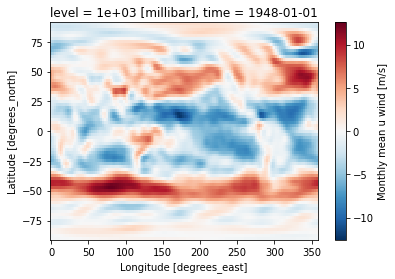

In [10]:
# พลอตตัวอย่างข้อมูล ที่ time=0, lev=0, global domain
print(uwin_.shape)
uwin_[0,0,:,:].plot()

In [11]:
print(uwin_.shape)
uwin_10yrs = uwin_.loc['2001-01':'2010-12'] # เลือกช่วงเวลาที่ต้องการวิเคราะห์
print('uwin_10yrs:', uwin_10yrs.shape)
print('uwin_10yrs first time', uwin_10yrs.time[0].values)
print('uwin_10yrs last time', uwin_10yrs.time[-1].values)

(891, 17, 73, 144)
uwin_10yrs: (120, 17, 73, 144)
uwin_10yrs first time 2001-01-01T00:00:00.000000000
uwin_10yrs last time 2010-12-01T00:00:00.000000000


## 4. คำนวนค่าเฉลี่ยลมและส่วนเบี่ยงเบนมาตรฐาน

In [12]:
uwin_10yrs

<xarray.DataArray 'uwnd' (time: 120, level: 17, lat: 73, lon: 144)>
[21444480 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2010-12-01
Attributes:
    long_name:     Monthly mean u wind
    units:         m/s
    precision:     2
    var_desc:      u-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.194824 124.399994]

In [13]:
#ทำการหาค่าเฉลี่ย AVERAGE
print('uwind average shape before', uwin_.shape)
u_10y = np.mean(uwin_10yrs, axis=0) # ค่าเฉลี่ย 10 ปี

uwin_mean = uwin_.mean(axis=0)
print('uwind average shape after', uwin_mean.shape)

#ทำการคำนวณค่าเบี่ยงเบนมาตรฐาน Standard deviation
print('uwind standard deviation shape before', uwin_.shape)

u_10y_std = np.std(uwin_10yrs, axis=0) # ค่าเบี่ยงเบนมาตรฐาน 10 ปี


uwin_std = uwin_.std(axis=0)
print('uwind standard deviation shape after', uwin_std.shape)

uwind average shape before (891, 17, 73, 144)
uwind average shape after (17, 73, 144)
uwind standard deviation shape before (891, 17, 73, 144)
uwind standard deviation shape after (17, 73, 144)


## 5.พลอตแผนที่ลมเฉลี่ย zonal wind ที่ระดับ 1000 hpa ของค่าเฉลี่ยลมในช่วงปี 2000-2010

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\cr

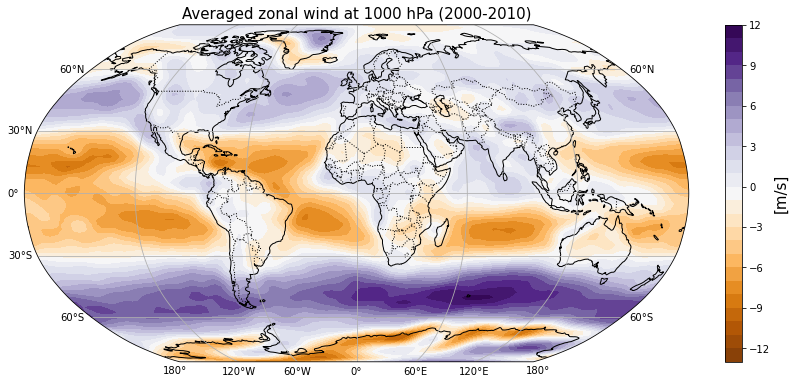

In [14]:
## พลอตแผนที่ลมเฉลี่ย 1000 hpa ของค่าเฉลี่ยลมในช่วงปี 2000-2010
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(u_10y, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/

ax = plt.subplot(111, projection=ccrs.Robinson())
max_ = np.round((np.max(uw_cyc[0])))+2
min_ = max_*(-1)

#min_ = -12
#max_ = 12
vstep = 1.0
levels = np.arange(min_, max_, vstep)
wind_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc[0,:,:],\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                  cmap='PuOr')

ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc[0,:,:].shape[0]/uw_cyc[0,:,:].shape[1]
cbar = plt.colorbar(wind_,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)


plt.title('Averaged zonal wind at 1000 hPa (2000-2010)', fontsize=15)
plt.show()


## 6.พลอตแผนที่ส่วนเบี่ยงเบนมาตรฐานของ zonal wind ที่ระดับความกดอากาศ 1000 hPa ช่วงปี 2000-2010

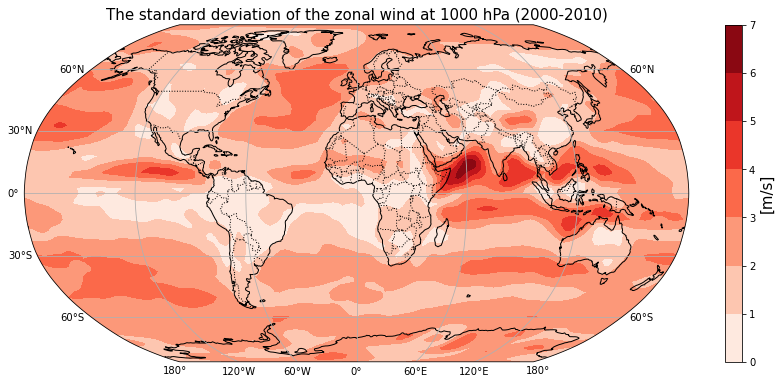

In [15]:
#standard deviation at 1000 hPa
plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(u_10y_std, coord=lon_)

ax = plt.subplot(111, projection=ccrs.Robinson())
min_ = np.round((np.min(uw_cyc[0])))
max_ = np.round((np.max(uw_cyc[0])))+1
vstep = 1.0
levels = np.arange(min_, max_, vstep)
wind_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc[0,:,:],\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                  cmap='Reds')

ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc[0,:,:].shape[0]/uw_cyc[0,:,:].shape[1]
cbar = plt.colorbar(wind_,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)


plt.title('The standard deviation of the zonal wind at 1000 hPa (2000-2010)',fontsize=15)
plt.show()


## 7. พลอตแผนที่ลมเฉลี่ย zonal wind ที่ระดับ 500 hpa ของค่าเฉลี่ยลมในช่วงปี 2000-2010

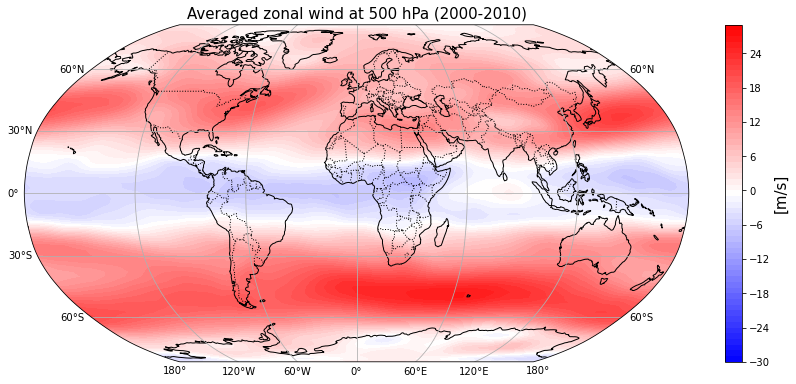

In [16]:
## พลอตแผนที่ลมเฉลี่ย 500 hpa ของค่าเฉลี่ยลมในช่วงปี 2000-2010
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(u_10y, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/

ax = plt.subplot(111, projection=ccrs.Robinson())
min_ = -30
max_ = 30
vstep = 1.0
levels = np.arange(min_, max_, vstep)
wind_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc[5,:,:],\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                  cmap='bwr')

ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc[0,:,:].shape[0]/uw_cyc[0,:,:].shape[1]
cbar = plt.colorbar(wind_,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)


plt.title('Averaged zonal wind at 500 hPa (2000-2010)', fontsize=15)
plt.show()


## 8. พลอต zonal wind เฉลี่ยเฉพาะของเดือนกรกฏาคม

เลือกเดือนกรกฏาคมในชุดข้อมูล reanalysis ก่อน

In [17]:
# เลือกโดยใช้วิธีการ groups ใน xarray เอาเฉพาะเดือนมาก่อน เพื่อให้ได้ index เดือนมา
month_idxs=df.groupby('time.month').groups

In [18]:
month_idxs;

In [19]:
# สกัดค่า index ของเดือนที่ต้องการ ในที่นี้ใช้ 7 แทนเดือนกรกฏาคม เนื่องจาก 1 คือเดือนมกราคม
jul_idxs=month_idxs[7]


In [20]:
jul_idxs;

In [21]:
# เมื่อได้ค่า index ของเดือนกรกฎาคม ให้นำมาใช้สกัดข้อมูลเดือนกรกฎาคมได้เลย
gs_jul=df.isel(time=jul_idxs)

In [22]:
gs_jul

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 74)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-07-01 1949-07-01 ... 2021-07-01
Data variables:
    uwnd     (time, level, lat, lon) float32 3.31 3.45 3.58 ... -2.836 -2.945
Attributes:
    title:          monthly mean u wind from the NCEP Reanalysis
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 22:36:33 1999: ncrcat uwnd.mon.mean.nc /Datase...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [23]:
#หาค่าเฉลี่ย zonal wind ของทุกช่วงเวลาในแต่ละทุกระดับความกดอากาศ 
um=gs_jul.mean('time')

In [24]:
um

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    uwnd     (level, lat, lon) float32 0.4198 0.4374 0.4541 ... -1.73 -1.904

****สำคัญมากๆ ในการแปลง Dataset ไปเป็น Dataarray เพื่อนำไปพลอตแผนที่

In [25]:
um1000hPa=um.to_array(dim='uwnd')

In [26]:
um1000hPa

<xarray.DataArray (uwnd: 1, level: 17, lat: 73, lon: 144)>
array([[[[ 4.19829190e-01,  4.37396526e-01,  4.54070896e-01, ...,
           3.62055123e-01,  3.82407725e-01,  4.00183499e-01],
         [ 4.95202154e-01,  5.14058828e-01,  5.32526910e-01, ...,
           4.45111513e-01,  4.60774124e-01,  4.77228075e-01],
         [ 6.23724818e-01,  6.11253202e-01,  6.05840087e-01, ...,
           7.06627488e-01,  6.71173275e-01,  6.43902421e-01],
         ...,
         [-7.17568970e+00, -6.71386766e+00, -6.24785376e+00, ...,
          -8.50121593e+00, -8.07342720e+00, -7.63045359e+00],
         [-6.19850302e+00, -5.78389025e+00, -5.35607910e+00, ...,
          -7.36160421e+00, -6.99054623e+00, -6.60162401e+00],
         [-2.31204295e+00, -1.94033015e+00, -1.56559658e+00, ...,
          -3.39721346e+00, -3.04099894e+00, -2.67896223e+00]],

        [[ 8.83419991e-01,  8.95662904e-01,  9.04615343e-01, ...,
           8.38058650e-01,  8.53898525e-01,  8.69126320e-01],
         [ 1.06458497e+00,  1.07242203e+00,  1.07801759e+00, ...,
           1.03966939e+00,  1.04918730e+00,  1.05798721e+00],
         [ 1.05853677e+00,  1.03517973e+00,  1.01434910e+00, ...,
           1.16271639e+00,  1.12286437e+00,  1.08959007e+00],
...
           3.89944839e+00,  3.69341636e+00,  3.49785089e+00],
         [ 8.65429103e-01,  6.39948845e-01,  4.20892239e-01, ...,
           1.57592154e+00,  1.33313513e+00,  1.09745705e+00],
         [-2.09769225e+00, -2.33837247e+00, -2.57413387e+00, ...,
          -1.35110855e+00, -1.60270929e+00, -1.85141957e+00]],

        [[-1.12899339e+00, -1.04784334e+00, -9.65998650e-01, ...,
          -1.35832131e+00, -1.28360033e+00, -1.20697296e+00],
         [-1.68410885e+00, -1.61889482e+00, -1.55049825e+00, ...,
          -1.85010862e+00, -1.80006671e+00, -1.74384367e+00],
         [-2.14562607e+00, -2.15283275e+00, -2.14973187e+00, ...,
          -2.05254722e+00, -2.09646392e+00, -2.12776947e+00],
         ...,
         [ 4.46351147e+00,  4.36223173e+00,  4.25638485e+00, ...,
           4.74226999e+00,  4.65563869e+00,  4.56145430e+00],
         [ 1.01187527e+00,  8.69710982e-01,  7.30111122e-01, ...,
           1.45121980e+00,  1.30372941e+00,  1.15716529e+00],
         [-2.07519603e+00, -2.24244761e+00, -2.40439367e+00, ...,
          -1.55325472e+00, -1.73000252e+00, -1.90419292e+00]]]],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * uwnd     (uwnd) <U4 'uwnd'

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\cr

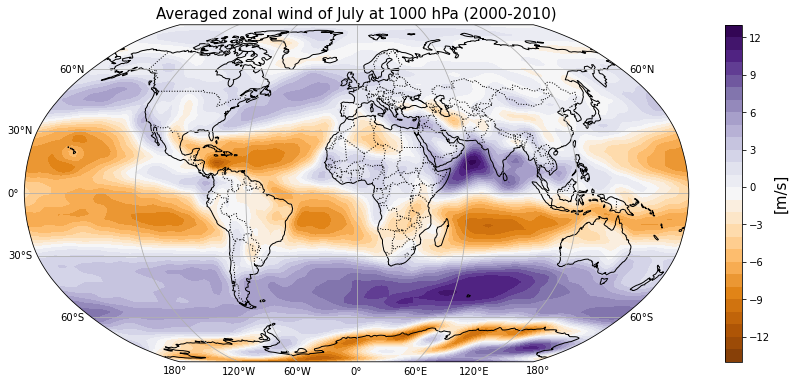

In [27]:
## พลอตแผนที่ลมเฉลี่ย 1000 hpa ของค่าเฉลี่ยลมเดือนกรกฏาคมในช่วงปี 2000-2010 
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(um1000hPa[0,:,:], coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
max_ = np.round((np.max(uw_cyc[0])))+2
min_ = max_*(-1)
vstep = 1.0
levels = np.arange(min_, max_, vstep)
wind_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc[0,:,:],\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='PuOr')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc[0,:,:].shape[0]/uw_cyc[0,:,:].shape[1]
cbar = plt.colorbar(wind_,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)


plt.title('Averaged zonal wind of July at 1000 hPa (2000-2010)', fontsize=15)
plt.show()

## 9. พลอตแผนที่ Anomaly ของปี 2021 เทียบกับแผนที่ลมเฉลี่ยรายเดือนเชิงภูมิอากาศวิทยาในระดับความกดอากาศ 850 hpa ในช่วงปี 1991-2020 ของเดือนกรกฎาคม
เนื่องจากข้อมูลเป็นแบบรายเดือน monthly การวิเคราะห์ข้อมูลในรูปแบบค่าเฉลี่ยจึงให้ค่าการวิเคราะห์ในระดับรายเดือน ในทางภูมิอากาศวิทยานิยมที่จะวิเคราะห์ค่าการเบี่ยงเบนของลมในเดือนที่สนใจด้วยการเทียบกับค่าลมเฉลี่ยเชิงภูมิอากาศ นั่นคือ anomalies = ค่าเฉลี่ยเชิงภูมิอากาศวิทยา - ค่าที่ต้องการเทียบ ซึ่งจะทำให้ได้ค่า anomaly โดยหลักการค่า anomaly นี้สามารถนำไปใช้กับตัวแปรทางอุตุนิยมวิทยาอื่นได้ ในแบบฝึกหัดนี้เราจะมาทำการ
* หาค่าลมเฉลี่ย zonal wind เชิงภูมิอากาศวิทยาในช่วงปี 1991-2020 ในช่วงเดือนกรกฎาคม แล้วทำการพลอตแผนที่
* หาค่าเบี่ยงเบน anomaly ของเดือนกรกฎาคม ปี 2021 กับ ค่าเฉลี่ย zonal wind ที่หาได้ในข้อแรก แล้วทำการพลอตแผนที่

สามารถศึกษา anomalies ได้จากลิงก์นี้ https://en.wikipedia.org/wiki/Temperature_anomaly

สูตรในการคำนวณ anomalies https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/anomalies.html นั่นคือ anomaly = X -Climatological mean

### 9.1 หาค่าลมเฉลี่ย zonal wind เชิงภูมิอากาศวิทยาในช่วงปี 1991-2020 ในช่วงเดือนกรกฎาคม

In [28]:
# เลือกโดยใช้วิธีการ groups ใน xarray เอาเฉพาะเดือนมาก่อน เพื่อให้ได้ index เดือนมา
month_idxs=df.groupby('time.month').groups
# สกัดค่า index ของเดือนที่ต้องการ ในที่นี้ใช้ 7 แทนเดือนกรกฏาคม เนื่องจาก 1 คือเดือนมกราคม
jul_idxs=month_idxs[7]
# เมื่อได้ค่า index ของเดือนกรกฎาคม ให้นำมาใช้สกัดข้อมูลเดือนกรกฎาคมได้เลย
gs_jul=df.isel(time=jul_idxs)

In [29]:
# เลือกลม 30 ปีที่ต้องการ
uwin_30yrs = uwin_.loc['1991-01':'2020-12']

In [30]:
uwin_30yrs

<xarray.DataArray 'uwnd' (time: 360, level: 17, lat: 73, lon: 144)>
array([[[[ -5.320007, ...,  -5.380005],
         ...,
         [ -0.180008, ...,  -0.339996]],

        ...,

        [[-22.089996, ..., -21.979996],
         ...,
         [ -1.270004, ...,  -1.229996]]],


       ...,


       [[[ -1.288709, ...,  -1.224193],
         ...,
         [  2.621775, ...,   2.445162]],

        ...,

        [[-32.20645 , ..., -32.15968 ],
         ...,
         [-12.52984 , ..., -12.336291]]]], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly mean u wind
    units:         m/s
    precision:     2
    var_desc:      u-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.194824 124.399994]

In [31]:
#หาค่าเฉลี่ย zonal wind ทั้ง 30 ปีในแต่ละทุกระดับความกดอากาศ 
um=uwin_30yrs.mean('time')

In [43]:
um.shape
# ยังเป็น xarray.Dataset จะยังไม่สามารถเรียกใช้อินเด็กในอาเรย์ได้ ต้องแปลงให้เป็นชนิดข้อมูล xarray.DataArray

(17, 73, 144)

In [33]:
um30yr_850hPa_jul=um.isel(level=2) # 2 คือ 850 hPa ให้สังเกตจาก Coordinates ที่ชื่อ level 0=1000, 1=925, 2=850 hPa

In [39]:
um30yr_850hPa_jul

<xarray.DataArray 'uwnd' (lat: 73, lon: 144)>
array([[-1.2301414 , -1.22669   , -1.2210912 , ..., -1.2258528 ,
        -1.2301687 , -1.2312133 ],
       [-0.86132026, -0.8545761 , -0.8468548 , ..., -0.87005675,
        -0.8687114 , -0.8659951 ],
       [-0.28420576, -0.31183437, -0.32876584, ..., -0.13403423,
        -0.19574982, -0.24545424],
       ...,
       [-6.0119014 , -5.6147127 , -5.207228  , ..., -7.1035237 ,
        -6.759292  , -6.394391  ],
       [-4.5041227 , -4.1466784 , -3.7801628 , ..., -5.5116916 ,
        -5.1881385 , -4.8517346 ],
       [-0.73875505, -0.41329437, -0.08688106, ..., -1.7037537 ,
        -1.3845565 , -1.0626701 ]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

****สำคัญมากๆ ในการแปลง Dataset ไปเป็น Dataarray เพื่อนำไปพลอตแผนที่

In [40]:
um30jul=um30yr_850hPa_jul

In [41]:
um30jul

<xarray.DataArray 'uwnd' (lat: 73, lon: 144)>
array([[-1.2301414 , -1.22669   , -1.2210912 , ..., -1.2258528 ,
        -1.2301687 , -1.2312133 ],
       [-0.86132026, -0.8545761 , -0.8468548 , ..., -0.87005675,
        -0.8687114 , -0.8659951 ],
       [-0.28420576, -0.31183437, -0.32876584, ..., -0.13403423,
        -0.19574982, -0.24545424],
       ...,
       [-6.0119014 , -5.6147127 , -5.207228  , ..., -7.1035237 ,
        -6.759292  , -6.394391  ],
       [-4.5041227 , -4.1466784 , -3.7801628 , ..., -5.5116916 ,
        -5.1881385 , -4.8517346 ],
       [-0.73875505, -0.41329437, -0.08688106, ..., -1.7037537 ,
        -1.3845565 , -1.0626701 ]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

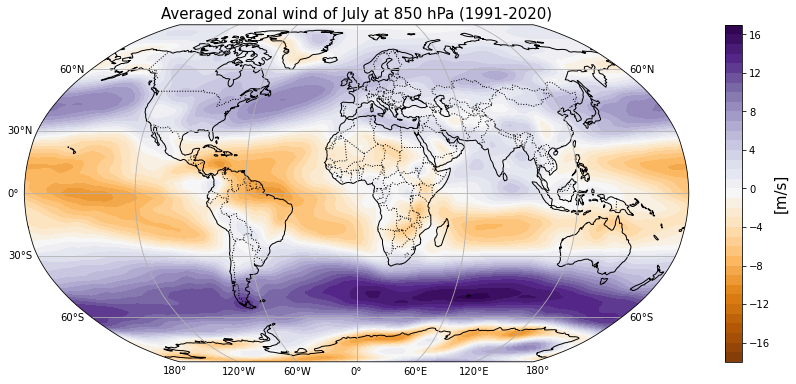

In [46]:
## พลอตแผนที่ลมเฉลี่ย 850 hpa ของค่าเฉลี่ยลมเดือนกรกฏาคมในช่วงปี 1991-2020  
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(um30jul, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
wind_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='PuOr')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
max_ = np.round((np.max(uw_cyc)))+2
min_ = max_*(-1)
vstep = 1.0
levels = np.arange(min_, max_, vstep)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(wind_,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)


plt.title('Averaged zonal wind of July at 850 hPa (1991-2020)', fontsize=15)
plt.show()

### 9.2 หาค่าลมเบี่ยงเบน anomaly ของลมเดือนกรกฎาคม ปี 2021 กับค่าลมเฉลี่ย zonal wind เชิงภูมิอากาศวิทยาในช่วงปี 1991-2020 ในช่วงเดือนกรกฎาคม

In [47]:
# เลือกลมเดือนกรกฎาคมปี 2021
uwin_jul2021 = uwin_.loc['2021-07']

In [48]:
uwin_jul2021

<xarray.DataArray 'uwnd' (time: 1, level: 17, lat: 73, lon: 144)>
array([[[[-2.499999, ..., -2.567741],
         ...,
         [-0.104031, ..., -0.437096]],

        ...,

        [[-1.815323, ..., -1.905645],
         ...,
         [-3.056452, ..., -2.945161]]]], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2021-07-01
Attributes:
    long_name:     Monthly mean u wind
    units:         m/s
    precision:     2
    var_desc:      u-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.194824 124.399994]

In [49]:
uw_jul21=uwin_jul2021[0,2,:,:] # ลม zonal เดือนกรกฎาคมของ ปี 2021

In [51]:
uw_jul21.shape

(73, 144)

In [52]:
uw_jul_climate=um30jul # ลม zonal เดือนกรกฎาคม เฉลี่ยของ 30 ปี

In [53]:
anomaly=uw_jul21 -uw_jul_climate
#  หากได้ค่า + แสดงว่าลม zonal ของปี 2021 ในกริดนั้นๆ มีค่าที่สูงกว่าค่าเฉลี่ยเชิงภูมิอากาศ 
# โดยที่ค่า + ของ zonal wind หมายถึงลมที่พัดไปทางตะวันออก ส่วนค่า - หมายถึงลมที่พัดไปทางตะวันตก

#สูตรในการหา anomaly https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/anomalies.html

In [54]:
anomaly

<xarray.DataArray 'uwnd' (lat: 73, lon: 144)>
array([[-0.6400194 , -0.56282544, -0.46923077, ..., -0.9015657 ,
        -0.816605  , -0.7308829 ],
       [ 0.15244997,  0.13038325,  0.10411358, ...,  0.16844422,
         0.17274433,  0.16841513],
       [ 1.0809805 ,  0.997319  ,  0.88763773, ...,  1.2420999 ,
         1.2070408 ,  1.155939  ],
       ...,
       [-0.07519531,  0.1582613 ,  0.39432526, ..., -0.72308826,
        -0.5173197 , -0.30480194],
       [ 0.5234785 ,  0.59425926,  0.6608088 , ...,  0.35604763,
         0.40991306,  0.46463776],
       [ 0.41698143,  0.4036177 ,  0.40139788, ...,  0.42633522,
         0.42165387,  0.42315477]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2021-07-01

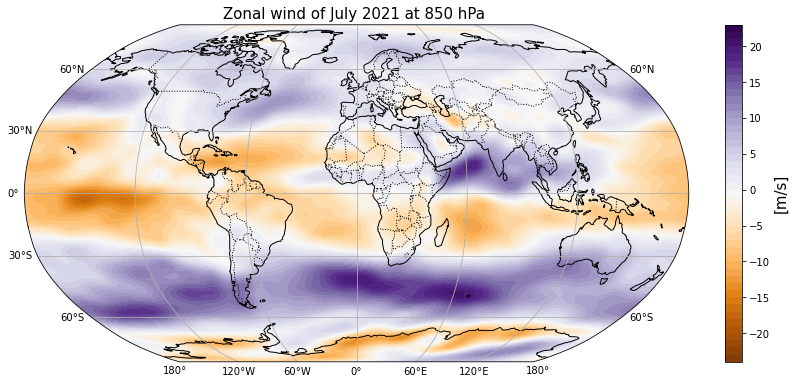

In [58]:
## พลอตแผนที่ลมเฉลี่ย 850 hpa ของค่าเฉลี่ยลม zonal wind เดือนกรกฏาคมปี 2021 
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(uw_jul21, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
wind_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='PuOr')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
max_ = np.round((np.max(uw_cyc)))+10
min_ = max_*(-1)
vstep = 1.0
levels = np.arange(min_, max_, vstep)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(wind_,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)


plt.title('Zonal wind of July 2021 at 850 hPa ', fontsize=15)
plt.show()

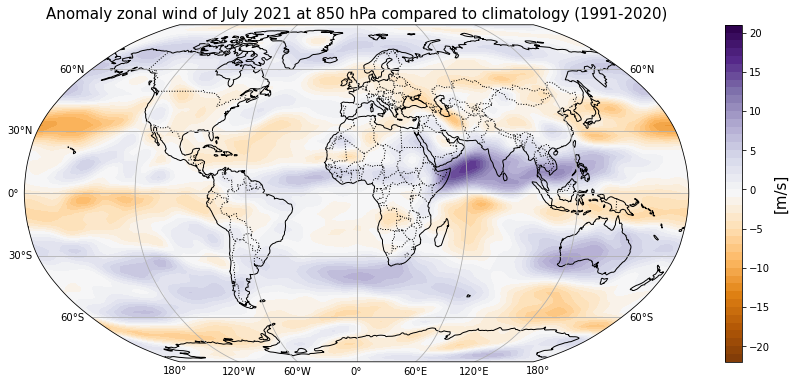

In [56]:
## พลอตแผนที่ anomaly ลมเฉลี่ย 850 hpa ของค่าเฉลี่ยลม zonal wind เดือนกรกฏาคมปี 2021 เทียบกับค่าเฉลี่ยเชิงภูมิอากาศในช่วงปี 1991-2020  
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(anomaly, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
wind_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='PuOr')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
max_ = np.round((np.max(uw_cyc)))+2
min_ = max_*(-1)
vstep = 1.0
levels = np.arange(min_, max_, vstep)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(wind_,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)


plt.title('Anomaly zonal wind of July 2021 at 850 hPa compared to climatology (1991-2020)', fontsize=15)
plt.show()

## แปลผล Anomaly
    * U-wind หรือ Zonal wind ได้กล่าวไปแล้วว่าหมายถึง ลมที่พัดในแนวตะวันออก-ตะวันตก หากมีค่า + แสดงว่า ลมพัดจากทิศตะวันตกไปทิศตะวันออก ในขณะที่หากเป็นค่า - แสดงว่า เป็นลมที่พัดจากทิศตะวันออกไปทิศตะวันตก
    * ส่วนผลของภาพแผนที่ Anomaly ด้านบน ได้มากจาก ค่าลม zonal ของเดือนกรกฎาคม 2021- ค่าเฉลี่ยลม zonal ในเดือนกรกฎาคมเชิงภูมิอากาาศ ทำให้มีทั้งค่าที่เป็นบวกและลบ 
    * ค่าที่เข้าใกล้ 0 แสดงถึงว่า ค่าของสองช่วงเวลามีค่าที่ใกล้เคียงกัน จึงถือว่ามีการเบี่ยงเบนเชิงสัมพัทธ์ต่อกันไม่มากนัก จึงไม่ใช่บริเวณที่น่าสนใจสักเท่าไหร่ ในบริบทของ anomaly
    * ค่าที่เป็น + หรือ - มากๆ แสดงถึงค่าที่มีการเบี่ยงเบนแบบผิดปรกติ จึงเป็นค่าที่น่าสนใจ 
    * ยกตัวอย่างในทวีปออสเตรเลียที่มีค่าบวกที่มาก หมายถึง ลมแรงที่พัดไปทางทิศตะวันออก (ลม u+) ของเดือนกรกฎาคมในปี 2021 มีค่าที่ลมที่มากกว่าลมในเชิงภูมิอากาศวิทยาเป็นอย่างมาก ที่โดยปรกติจะเป็นลมอ่อนๆ ที่พัดจากทิศตะวันออกไปยังทิศตะวันตก (ลม u-) ในทางตอนบนของทวีป ส่วนทางตอนล่างเป็นลมที่พัดจากตะวันตกไปทิศตะวันออก (ลม u+) แสดงถึงเหตุการณ์ที่ผิดปรกติ ซึ่งควรมีการหาสาเหตุทางด้านบรรยากาศวิทยาว่ามีความแปรปรวนของสภาพบรรยากาศอย่างไรบ้างในปี 2021 จึงเป็นสาเหตุให้เกิดลมที่แรงกว่าปรกติ ซึ่งการที่ลมแรงกว่าปรกติอาจนำมาซึ่งปริมาณฝนที่ตกมากกว่าปรกติ หากมีการพัดหอบเอาไอน้ำในบรรยากาศมาด้วย โดยเฉพาะบริเวณพื้นที่ชายฝั่งของทวีป โดยปรกติไอน้ำในอากาศมักจะกระจุกตัวอยู่ใกล้กับพื้นโลก เนื่องจากน้ำหนักของมันที่มีมากกว่าเมื่อเทียบกับก๊าซอื่นๆ ในบรรยากาศ
    * นอกจากนั้นยังมีกระแสลมที่แรงกว่าปรกติในปี 2021 ในแถบตะวันออกของมหาสมุทรแปซิคทางซีกโลกใต้ โดยเป็นลมที่พัดจากตะวันออกไปตะวันตก ในแนวเรียบเส้นศูนย์สูตร ที่มีลมแรงกว่าปรกติ อาจเป็นปัจจัยที่บ่งชี้ถึงปรากฏการณ์ลานีญ่าที่กระแสลมพัดไปทางตะวันตกแรงกว่าปีปรกติ
    * ในพื้นที่ทะเลอาหรับต่อเนื่องมาจนถึงอ่าวเบงกอลและทะเลจีนใต้ พบว่าค่า anomaly เป็น + แสดงถึงลมฝ่ายตะวันตกในเดือน กรกฎาคม 2021 แรงกว่าปีปรกติ



## ฝึกปฏิบัติ
* ให้นิสิตหาค่า anomaly ของ zonal wind ในเดือนมกราคมที่ระดับ 700 hPa และ 500 hPa
* ให้นิสิตดาวน์โหลด meridian wind หรื v-wind ซึ่งเป็นลมที่พัดในแนวเหนือใต้ โดยที่ค่า + หมายถึงลมที่พัดจากทิศใต้ไปทิศเหนือ ค่า - หมายถึงลมที่พัดจากจากทิศเหนือไปทิศใต้ ให้ดาวน์โหลดจากลิงก์นี้  https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.pressure.html แล้วนำมาหาค่า anomaly ของลมในระดับ 850 hPa
* ให้นิสิตเข้าไปดาวน์โหลดข้อมูล Air Temperature และ Relative Humidity เพื่อทำการหาค่าเฉลี่ยรายเดือนของสองตัวแปรนี้ พร้อมหาค่า anomaly ในระดับความกดอากาศ 850 hPa แล้วทำการพลอตแผนที่ให้เหมาะสม
    * นิสิตเลือกช่วงเวลาที่ต้องการได้จาก uwin_.loc['1991-01':'2020-12']
    * ดาวน์โหลดข้อมูล reanalysis ได้จากลิงก์นี้ https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.pressure.html